In [1]:
import pandas as pd
import plotly.graph_objects as go

In [2]:
interest_rates = pd.read_csv("../data/raw/interest_rates.csv")

In [3]:
fig = go.Figure()

# Add traces for each country
for country in interest_rates['country'].unique():
    country_data = interest_rates[interest_rates['country'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['date'],
        y=country_data['overnight_rate_pa'],
        mode='lines',
        name=country,
        visible=True  # Set all traces to visible initially
    ))

# Update layout to include a range slider on the x-axis
fig.update_layout(
    title="Overnight Rate by Date for Each Country",
    xaxis=dict(
        title="Date",
        type="date"  # Ensure the x-axis is interpreted as dates
    ),
    yaxis=dict(
        title="Overnight Rate (PA)",
        range=[-2.5, 8.5]  # Set y-axis range between -1 and 10
    ),
    legend_title="Country",
    template="plotly_dark",  # Use the dark template for black background
    plot_bgcolor="black",  # Set plot area background
    paper_bgcolor="black",  # Set outside background
    font=dict(color="white"),  # Ensure text is visible on a black background
    width=1400,  # Example width in pixels
    height=800   # Example height in pixels
)

fig.show()

In [12]:
fig = go.Figure()

# Add traces for each country
for country in interest_rates['country'].unique():
    country_data = interest_rates[interest_rates['country'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['date'],
        y=country_data['overnight_rate_pa'],
        mode='lines',
        name=country,
        visible=True  # All traces visible initially
    ))

# Define event ranges and annotations
events = {
    "Full Range": (interest_rates['date'].min(), interest_rates['date'].max()),
    "Dotcom Bubble": ("2000-01-01", "2002-12-31"),
    "Global Financial Crisis": ("2007-01-01", "2009-12-31"),
    "COVID-19 Pandemic": ("2019-06-30", "2020-06-30"),
    "Post-Pandemic Inflation": ("2021-10-01", "2023-12-31")
}


annotations = [
    dict(
        x=(pd.to_datetime(start) + (pd.to_datetime(end) - pd.to_datetime(start)) / 2).strftime("%Y-%m-%d"),
        y=interest_rates['overnight_rate_pa'].max(),  # Place annotations near the top
        text=event,
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        ax=0,
        ay=-40
    )
    for event, (start, end) in events.items() if event != "Full Range"
]

# Add buttons for each event
buttons = [
    dict(
        label=event,
        method="relayout",
        args=[{
            "xaxis.range": [start, end]
        }]
    )
    for event, (start, end) in events.items()
]

# Update layout for enhancements
fig.update_layout(
    title="Overnight Rate by Date for Each Country",
    xaxis=dict(
        title="Date",
        rangeslider=dict(visible=True),
        type="date",
        range=[interest_rates['date'].min(), interest_rates['date'].max()]
    ),
    yaxis=dict(
        title="Overnight Rate (PA)",
        range=[-1.5, 9.5]
    ),
    legend_title="Country",
    template="plotly_dark",
    hovermode="x unified",
    plot_bgcolor="black",
    paper_bgcolor="black",
    font=dict(color="white"),
    width=1600,
    height=800,
    updatemenus=[
        dict(
            type="buttons",
            showactive=True,
            buttons=buttons,
            direction="left",
            x=0.3,
            y=1.15,
            xanchor="left",
            yanchor="top",
            pad={"r": 10, "t": 10},
            bgcolor="lightgrey",
            font=dict(color="black")
        )],
    annotations=annotations
)

fig.show()

In [14]:
# Save the figure as an HTML file
fig.write_html("overnight_rates_plot.html")

# Display a link to the HTML file (Markdown cell in Jupyter Notebook)
from IPython.display import display, HTML
display(HTML('<a href="overnight_rates_plot.html" target="_blank">Interactive Plot: Overnight Rate by Date for Each Country</a>'))

[Click here to view the interactive plot](overnight_rates_plot.html)

**Evaluation based on volatility**

Calculate the volatility of overnight interest rates in each country (such as standard deviation) to measure the uncertainty of overnight interest rates:

In [6]:
risk_metrics = interest_rates.groupby('country')['overnight_rate_pa'].std().sort_values(ascending=False)
print(risk_metrics)


country
New Zealand      2.307430
Norway           2.197673
UK               2.187060
United States    2.017382
Australia        1.957084
Germany          1.763852
Sweden           1.668327
Canada           1.650874
Switzerland      1.113789
Japan            0.141181
Name: overnight_rate_pa, dtype: float64


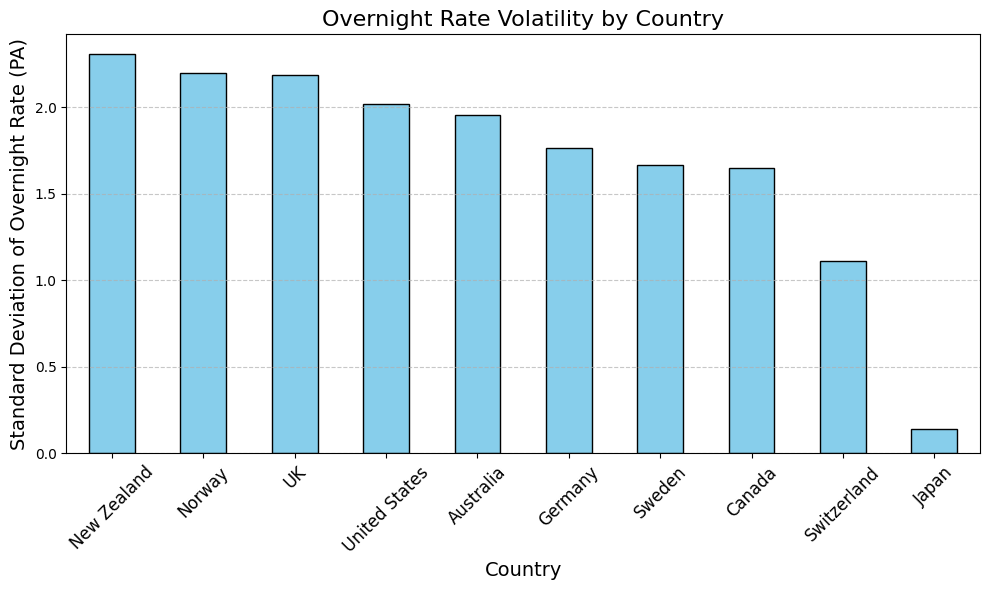

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
risk_metrics.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Overnight Rate Volatility by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Standard Deviation of Overnight Rate (PA)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Analysis Based on Standard Deviation (Volatility)

- **New Zealand (NZD)** and **Norway (NOK)** have the highest overnight rate volatility, at **2.307** and **2.198**, respectively. This indicates that holding these currencies entails higher interest rate risks, potentially influenced by greater economic or policy fluctuations.
  
- **United Kingdom (GBP)** and **United States (USD)** also exhibit relatively high volatility, though slightly lower than New Zealand and Norway. These currencies are also considered high-risk options for Swiss residents.

- **Switzerland (CHF)** and **Japan (JPY)** show the lowest overnight rate volatility, at **1.114** and **0.141**, respectively. This indicates that holding these currencies carries the least risk, with Japan's volatility being almost negligible.

---

### Conclusion

- For Swiss residents, **New Zealand Dollar (NZD)** is the riskiest currency to hold based on overnight rate volatility, while **Japanese Yen (JPY)** is the safest.
- If a more stable investment is preferred, currencies with lower volatility should be prioritized.
- Future analysis should incorporate exchange rate volatility or other economic indicators to comprehensively evaluate overall currency risk.
